In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
import sys
import time
import sklearn
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for model in mpl, np, pd, sklearn, keras:
    print(model.__name__, model.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.19.0
pandas 1.0.5
sklearn 0.23.1
tensorflow_core.keras 2.2.4-tf


In [2]:
# 回归问题
# 加利福利亚
from sklearn.datasets import fetch_california_housing
#加载数据
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint
#展示数据 查看规律
pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split

#数据切割 训练集 验证集 测试
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7, test_size=0.25)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

#数据归一化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled =  scaler.transform(x_test)

In [9]:
# learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
# W = W + grad * learning_rate
#model构建
learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(50, activation='relu', input_shape=x_train.shape[1:]),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss='mse',optimizer=optimizer,metrics=['accuracy'])
    callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-8)]
    history = model.fit(x_train_scaled,y_train, validation_data = (x_valid_scaled,y_valid), epochs=50, callbacks = callbacks)
    histories.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 3s 248us/sample - loss: 6.2196 - accuracy: 8.6133e-05 - val_loss: 5.2113 - val_accuracy: 0.0000e+00
Epoch 2/50
11610/11610 [==============================] - 1s 76us/sample - loss: 4.1057 - accuracy: 0.0012 - val_loss: 3.5900 - val_accuracy: 0.0010
Epoch 3/50
11610/11610 [==============================] - 1s 72us/sample - loss: 2.8571 - accuracy: 0.0028 - val_loss: 2.5655 - val_accuracy: 0.0023
Epoch 4/50
11610/11610 [==============================] - 1s 76us/sample - loss: 2.0667 - accuracy: 0.0031 - val_loss: 1.9262 - val_accuracy: 0.0023
Epoch 5/50
11610/11610 [==============================] - 1s 78us/sample - loss: 1.5821 - accuracy: 0.0031 - val_loss: 1.5404 - val_accuracy: 0.0023
Epoch 6/50
11610/11610 [==============================] - 1s 70us/sample - loss: 1.2978 - accuracy: 0.0031 - val_loss: 1.3156 - val_accuracy: 0.0023
Epoch 7/50
11610/11610 [========================

11610/11610 [==============================] - 1s 82us/sample - loss: 0.9755 - accuracy: 0.0031 - val_loss: 0.9685 - val_accuracy: 0.0023
Epoch 5/50
11610/11610 [==============================] - 1s 96us/sample - loss: 0.8670 - accuracy: 0.0031 - val_loss: 0.8847 - val_accuracy: 0.0023
Epoch 6/50
11610/11610 [==============================] - 1s 71us/sample - loss: 0.8090 - accuracy: 0.0031 - val_loss: 0.8372 - val_accuracy: 0.0023
Epoch 7/50
11610/11610 [==============================] - 1s 72us/sample - loss: 0.7737 - accuracy: 0.0031 - val_loss: 0.8071 - val_accuracy: 0.0023
Epoch 8/50
11610/11610 [==============================] - 1s 75us/sample - loss: 0.7484 - accuracy: 0.0031 - val_loss: 0.7838 - val_accuracy: 0.0023
Epoch 9/50
11610/11610 [==============================] - 1s 85us/sample - loss: 0.7286 - accuracy: 0.0031 - val_loss: 0.7657 - val_accuracy: 0.0023
Epoch 10/50
11610/11610 [==============================] - 1s 75us/sample - loss: 0.7116 - accuracy: 0.0031 - val_los

11610/11610 [==============================] - 1s 74us/sample - loss: 0.4955 - accuracy: 0.0031 - val_loss: 0.5233 - val_accuracy: 0.0023
Epoch 9/50
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4811 - accuracy: 0.0031 - val_loss: 0.5078 - val_accuracy: 0.0023
Epoch 10/50
11610/11610 [==============================] - 1s 83us/sample - loss: 0.4686 - accuracy: 0.0031 - val_loss: 0.4966 - val_accuracy: 0.0023
Epoch 11/50
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4585 - accuracy: 0.0031 - val_loss: 0.4846 - val_accuracy: 0.0023
Epoch 12/50
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4510 - accuracy: 0.0031 - val_loss: 0.4753 - val_accuracy: 0.0023
Epoch 13/50
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4448 - accuracy: 0.0031 - val_loss: 0.4674 - val_accuracy: 0.0023
Epoch 14/50
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4371 - accuracy: 0.0031 - val

11610/11610 [==============================] - 1s 104us/sample - loss: 0.3870 - accuracy: 0.0031 - val_loss: 0.4088 - val_accuracy: 0.0023
Epoch 13/50
11610/11610 [==============================] - 1s 90us/sample - loss: 0.3830 - accuracy: 0.0031 - val_loss: 0.4010 - val_accuracy: 0.0023
Epoch 14/50
11610/11610 [==============================] - 1s 81us/sample - loss: 0.3774 - accuracy: 0.0031 - val_loss: 0.3945 - val_accuracy: 0.0023
Epoch 15/50
11610/11610 [==============================] - 1s 111us/sample - loss: 0.3734 - accuracy: 0.0031 - val_loss: 0.3926 - val_accuracy: 0.0023
Epoch 16/50
11610/11610 [==============================] - 1s 89us/sample - loss: 0.3699 - accuracy: 0.0031 - val_loss: 0.3874 - val_accuracy: 0.0023
Epoch 17/50
11610/11610 [==============================] - 1s 89us/sample - loss: 0.3666 - accuracy: 0.0031 - val_loss: 0.3889 - val_accuracy: 0.0023
Epoch 18/50
11610/11610 [==============================] - 1s 85us/sample - loss: 0.3638 - accuracy: 0.0031 - 

11610/11610 [==============================] - 2s 130us/sample - loss: 0.3293 - accuracy: 0.0031 - val_loss: 0.3483 - val_accuracy: 0.0023
Epoch 17/50
11610/11610 [==============================] - 1s 87us/sample - loss: 0.3261 - accuracy: 0.0031 - val_loss: 0.3531 - val_accuracy: 0.0023
Epoch 18/50
11610/11610 [==============================] - 1s 88us/sample - loss: 0.3245 - accuracy: 0.0031 - val_loss: 0.3450 - val_accuracy: 0.0023
Epoch 19/50
11610/11610 [==============================] - 1s 82us/sample - loss: 0.3220 - accuracy: 0.0031 - val_loss: 0.3364 - val_accuracy: 0.0023
Epoch 20/50
11610/11610 [==============================] - 1s 83us/sample - loss: 0.3194 - accuracy: 0.0031 - val_loss: 0.3734 - val_accuracy: 0.0023
Epoch 21/50
11610/11610 [==============================] - 1s 83us/sample - loss: 0.3180 - accuracy: 0.0031 - val_loss: 0.3361 - val_accuracy: 0.0023
Epoch 22/50
11610/11610 [==============================] - 1s 82us/sample - loss: 0.3162 - accuracy: 0.0031 - v

Learning rate: 0.0001


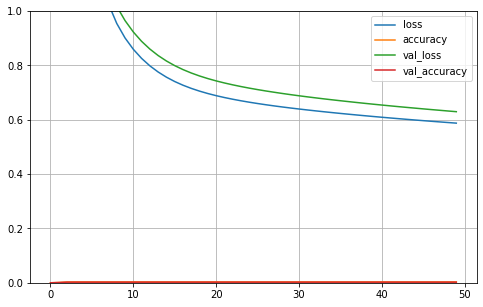

Learning rate: 0.0003


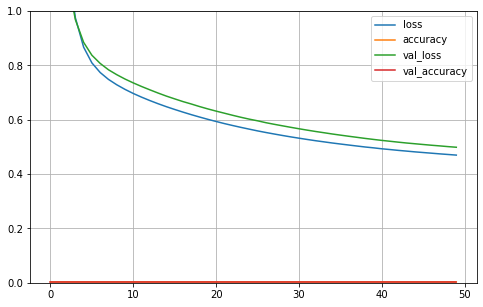

Learning rate: 0.001


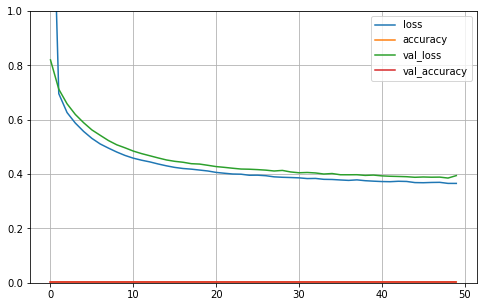

Learning rate: 0.003


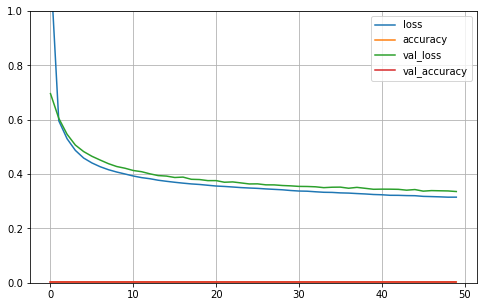

Learning rate: 0.01


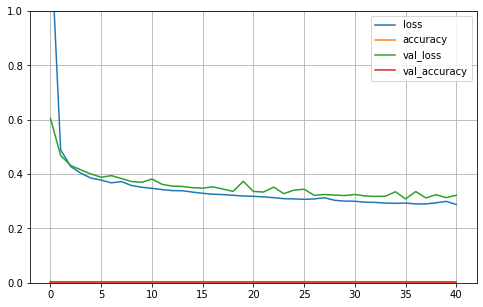

Learning rate: 0.03


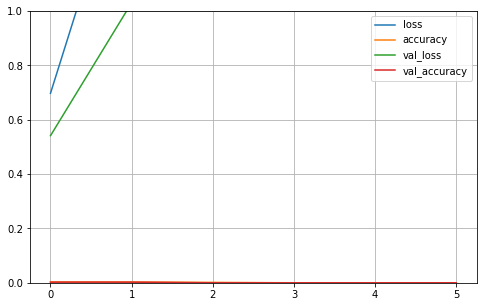

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

for lr,history in zip(learning_rates,histories):
    print("Learning rate:", lr)
    plot_learning_curves(history)
